## Data Visualization and Result Analysis
#### Chapter 5 - Scaling Up: Complexity
#### Chapter 6 - Scaling Up: Size

___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# load summaries for chapter 2
# chap2_sum = {}
# print('[INFO] loading chapter 2 summaries...')
# for i in range(4):
#     temp = {}
#     for j in [100, 300, 500]:
#         filepath = f'../../archive/experiments_2/instances_042220_{i}/jobs_{j}/summary.xlsx'
#         if i == 0:
#             temp[j] = [pd.read_excel(filepath, 'current_exp')]
#         else:
#             temp[j] = [pd.read_excel(filepath, 'current_exp_pack'),
#                        pd.read_excel(filepath, 'current_exp_sched')]
#     chap2_sum[i] = temp
#     print(f'results loaded for model type {i}')

In [4]:
# load instances for chapter 2
# chap2_instances = {}
# print('[INFO] loading chapter 2 individual instance results...')
# for model in range(4):
#     job = {}
#     b1 = {}
#     b2 = {}
#     qual = {}
#     param = {}
#     for key in chap2_sum[model].keys():
#         temp1 = {}
#         temp2 = {}
#         temp3 = {}
#         temp4 = {}
#         temp5 = {}
#         for i in range(30):
#             filepath = f'../../archive/experiments_2/instances_042220_{model}/jobs_{key}/instance_{i}.xlsx'
#             temp1[i] = pd.read_excel(filepath,
#                                      sheet_name='results',
#                                      usecols='D:O')
#             temp2[i] = pd.read_excel(filepath,
#                                      sheet_name='results',
#                                      usecols='U:AM')
#             temp3[i] = pd.read_excel(filepath,
#                                      sheet_name='results',
#                                      usecols='AO:AU')
#             temp4[i] = pd.read_excel(filepath,
#                                      sheet_name='quality_over_time')
#             temp5[i] = pd.read_excel(filepath,
#                                      sheet_name='order_jobs')
#         job[key] = temp1
#         b1[key] = temp2
#         b2[key] = temp3
#         qual[key] = temp4
#         param[key] = temp5
#         print(f'results loaded for {key} jobs and model {model}')
#     chap2_instances[model] = {}
#     chap2_instances[model]['job_results'] = job
#     chap2_instances[model]['b1_results'] = b1
#     chap2_instances[model]['b2_results'] = b2
#     chap2_instances[model]['qual'] = qual
#     chap2_instances[model]['job_params'] = param

In [5]:
# load summaries for chapter 3
# chap3_sum = {}
# print('[INFO] loading chapter 3 summaries...')
# for i in range(3, 9):
#     temp = {}
#     for j in [1000, 2000, 3000, 4000]:
#         filepath = f'../../archive/experiments_2/instances_042220_{i}/jobs_{j}/summary.xlsx'
#         temp[j] = [pd.read_excel(filepath, 'current_exp_pack'),
#                    pd.read_excel(filepath, 'current_exp_sched')]
#     chap3_sum[i] = temp
#     print(f'results loaded for model type {i}')
# chap3_sum['3_noRSP'] = {}
# for j in [100, 300, 500, 1000, 2000, 3000, 4000]:
#     filepath = f'../../archive/experiments_2/instances_042220_3_noRSP/jobs_{j}/summary.xlsx'
#     chap3_sum['3_noRSP'][j] = [pd.read_excel(filepath, 'current_exp_pack'),
#                                pd.read_excel(filepath, 'current_exp_sched')]
# print(f'results loaded for model type 3_noRSP')

In [6]:
# load instances for chapter 3
# chap3_instances = {}
# print('[INFO] loading chapter 3 individual instance results...')
# for model in ['3_noRSP', 3, 4, 5, 6, 7, 8]:
#     job = {}
#     b1 = {}
#     b2 = {}
#     qual = {}
#     param = {}
#     for key in chap3_sum[model].keys():
#         temp1 = {}
#         temp2 = {}
#         temp3 = {}
#         temp4 = {}
#         temp5 = {}
#         for i in range(30):
#             filepath = f'../../archive/experiments_2/instances_042220_{model}/jobs_{key}/instance_{i}.xlsx'
#             temp1[i] = pd.read_excel(filepath,
#                                      sheet_name='results',
#                                      usecols='D:O')
#             temp2[i] = pd.read_excel(filepath,
#                                      sheet_name='results',
#                                      usecols='U:AM')
#             temp3[i] = pd.read_excel(filepath,
#                                      sheet_name='results',
#                                      usecols='AO:AU')
#             temp4[i] = pd.read_excel(filepath,
#                                      sheet_name='quality_over_time')
#             temp5[i] = pd.read_excel(filepath,
#                                      sheet_name='order_jobs')
#         job[key] = temp1
#         b1[key] = temp2
#         b2[key] = temp3
#         qual[key] = temp4
#         param[key] = temp5
#         print(f'results loaded for {key} jobs and model {model}')
#     chap3_instances[model] = {}
#     chap3_instances[model]['job_results'] = job
#     chap3_instances[model]['b1_results'] = b1
#     chap3_instances[model]['b2_results'] = b2
#     chap3_instances[model]['qual'] = qual
#     chap3_instances[model]['job_params'] = param

In [7]:
# save all loaded dataframes to pickles
# pickle.dump(chap2_sum, open('../../archive/experiments_2/dumps/chap2_sum.pkl', 'wb'))
# pickle.dump(chap2_instances, open('../../archive/experiments_2/dumps/chap2_instances.pkl', 'wb'))
# pickle.dump(chap3_sum, open('../../archive/experiments_2/dumps/chap3_sum.pkl', 'wb'))
# pickle.dump(chap3_instances, open('../../archive/experiments_2/dumps/chap3_instances.pkl', 'wb'))

In [2]:
# load dumped dictionaries
chap2_sum = pickle.load(open('../../archive/experiments_2/dumps/chap2_sum.pkl', 'rb'))
chap2_instances = pickle.load(open('../../archive/experiments_2/dumps/chap2_instances.pkl', 'rb'))
chap3_sum = pickle.load(open('../../archive/experiments_2/dumps/chap3_sum.pkl', 'rb'))
chap3_instances = pickle.load(open('../../archive/experiments_2/dumps/chap3_instances.pkl', 'rb'))

In [3]:
# set model names
model_names = ['LBBD', 'CP-CP', 'MIP-CP', 'EDD-CP', 'EDD-PS', 'EDD-PSGA', 'SCC-CP', 'SCC-PS', 'SCC-PSGA']

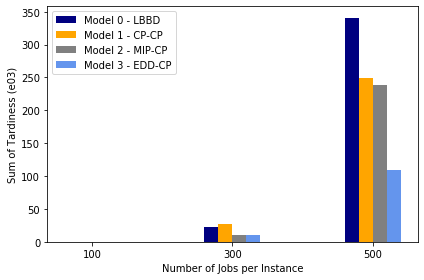

In [4]:
# compare average tardiness between techniques for chapter 2
fig, ax = plt.subplots()
width = 0.1
x = [-width * 1.5, -width * 0.5, width * 0.5, width * 1.5]
colors = ['navy', 'orange', 'grey', 'cornflowerblue']
for model in range(4):
    for k, key in enumerate(chap2_sum[model].keys()):
        if model == 0:
            avg_tardy = np.mean(chap2_sum[model][key][0]['tardiness']) / 1000
        else:
            avg_tardy = np.mean(chap2_sum[model][key][1]['tardiness']) / 1000
        if k == 0:
            ax.bar(k + x[model],
                   avg_tardy,
                   width,
                   color=colors[model],
                   label=f'Model {model} - {model_names[model]}')
        else:
            ax.bar(k + x[model],
                   avg_tardy,
                   width,
                   color=colors[model])
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['100', '300', '500'])
ax.set_xlabel('Number of Jobs per Instance')
ax.set_ylabel('Sum of Tardiness (e03)')
ax.legend()
fig.tight_layout()
plt.savefig('ch2_comptardy.pdf', format='pdf', bbox_inches='tight')
plt.show()

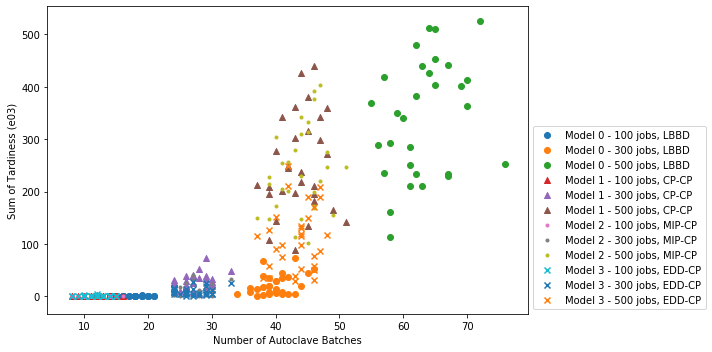

In [5]:
# compare numbins to tardiness for chapter 2
fig, ax = plt.subplots(figsize=(10, 5))
params = ['o', '^', '.', 'x']
for model in range(4):
    for key in chap2_sum[model].keys():
        numbins = []
        tardiness = []
        if model == 0:
            for i in range(30):
                numbins.append(chap2_sum[model][key][0]['numbins'][i])
                tardiness.append(chap2_sum[model][key][0]['tardiness'][i])
        else:
            for i in range(30):
                numbins.append(chap2_sum[model][key][0]['numbins'][i])
                tardiness.append(chap2_sum[model][key][1]['tardiness'][i])
        ax.scatter(numbins,
                   [tardiness[j] / 1000 for j in range(30)],
                   marker=params[model],
                   label=f'Model {model} - {key} jobs, {model_names[model]}')
ax.set_xlabel('Number of Autoclave Batches')
ax.set_ylabel('Sum of Tardiness (e03)')
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
fig.tight_layout()
plt.savefig('ch2_binstotardy.pdf', format='pdf', bbox_inches='tight')
plt.show()

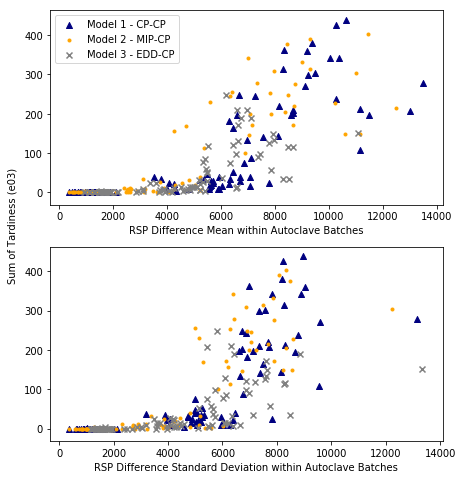

In [6]:
# compare tardiness to RSP distribution for chapter 2
fig, ax = plt.subplots(2, figsize=(7, 7))
params = ['^', '.', 'x']
colors = ['navy', 'orange', 'grey']
for model in range(1, 4):
    for key in chap2_sum[model].keys():
        rsp_mean = []
        rsp_stdev = []
        tardiness = []
        for i in range(30):
            tardiness.append(chap2_sum[model][key][1]['tardiness'][i] / 1000)
            rsp_mean.append(np.mean(chap2_instances[model]['b2_results'][key][i]['rsp_diff']))
            rsp_stdev.append(np.std(chap2_instances[model]['b2_results'][key][i]['rsp_diff']))
        if key == 100:
            ax[0].scatter(rsp_mean,
                          tardiness,
                          marker=params[model - 1],
                          color=colors[model - 1],
                          label=f'Model {model} - {model_names[model]}')
            ax[1].scatter(rsp_stdev,
                          tardiness,
                          marker=params[model - 1],
                          color=colors[model - 1],
                          label=f'Model {model} - {model_names[model]}')
        else:
            ax[0].scatter(rsp_mean, tardiness, marker=params[model - 1], color=colors[model - 1])
            ax[1].scatter(rsp_stdev, tardiness, marker=params[model - 1], color=colors[model - 1])
ax[0].legend()
ax[0].set_xlabel('RSP Difference Mean within Autoclave Batches')
ax[1].set_xlabel('RSP Difference Standard Deviation within Autoclave Batches')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Sum of Tardiness (e03)', labelpad=10)
fig.tight_layout()
plt.savefig('ch2_rspdistrib.pdf', format='pdf', bbox_inches='tight')
plt.show()

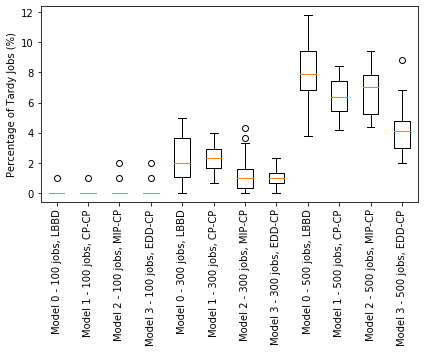

In [7]:
# compare the percentage of tardy jobs across techniques for chapter 2
fig, ax = plt.subplots(figsize=(6, 5))
x = 0
xticks = []
data = []
for k, key in enumerate(chap2_sum[0].keys()):
    for model in range(4):
        percent_tardy = []
        for i in range(30):
            percent_tardy.append(np.count_nonzero(chap2_instances[model]['job_results'][key][i]['job_tardiness']) /
                                 key * 100)
        data.append(percent_tardy)
        xticks.append(f'Model {model} - {key} jobs, {model_names[model]}')
        x = x + 1
ax.boxplot(data)
ax.set_ylabel('Percentage of Tardy Jobs (%)')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(xticks, rotation='vertical')
fig.tight_layout()
plt.savefig('ch2_percenttardy.pdf', format='pdf', bbox_inches='tight')
plt.show()

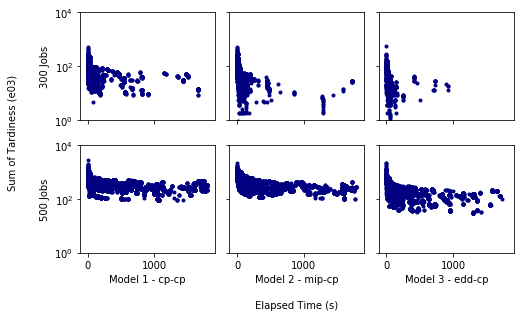

In [8]:
# extract schedule quality over time pattern for CP sched for models 0 to 2 for chapter 2
fig, ax = plt.subplots(2, 3, figsize=(8, 5), sharex=True, sharey=True)
plt.yscale('log')
for model in range(1, 4):
    for k, key in enumerate(chap2_sum[model].keys()):
        if k > 0:
            for i in range(30):
                ax[k - 1][model - 1].scatter(chap2_instances[model]['qual'][key][i]['time'],
                                         chap2_instances[model]['qual'][key][i]['quality'] / 1000,
                                         marker='.',
                                         color='navy')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax[0][0].set_ylabel('300 Jobs')
ax[1][0].set_ylabel('500 Jobs')
ax[1][0].set_xlabel('Model 1 - cp-cp')
ax[1][1].set_xlabel('Model 2 - mip-cp')
ax[1][2].set_xlabel('Model 3 - edd-cp')
ax[0][0].set_ylim(10**0, 10**4)
plt.xlabel('Elapsed Time (s)', labelpad=30)
plt.ylabel('Sum of Tardiness (e03)', labelpad=40)
fig.tight_layout()
plt.savefig('ch2_qualovertime.pdf', format='pdf', bbox_inches='tight')
plt.show()

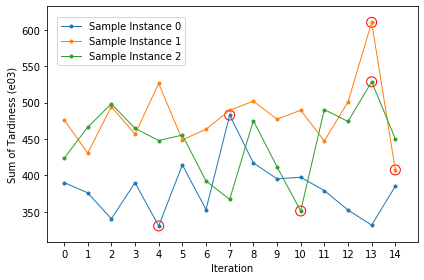

In [22]:
# graph objective values of test model 0 instances
model0_test_instances = {}
model0_test_instances[0] = [390257.0, 376217.0, 340512.0, 
                            390094.0, 330677.0, 414507.0, 
                            353192.0, 482960.0, 417289.0, 
                            395434.0, 397558.0, 379282.0, 
                            352527.0, 331856.0, 385309.0]
model0_test_instances[1] = [476701.0, 430804.0, 494518.0, 
                            456699.0, 526384.0, 448848.0, 
                            463583.0, 489582.0, 501952.0, 
                            477374.0, 489587.0, 447376.0, 
                            500902.0, 610263.0, 407616.0]
model0_test_instances[2] = [423540.0, 466266.0, 498426.0, 
                            464748.0, 448015.0, 455474.0, 
                            392547.0, 367162.0, 475313.0, 
                            412026.0, 351244.0, 490481.0, 
                            474166.0, 528678.0, 450231.0]
fig, ax = plt.subplots()
for i in range(3):
    ax.plot(np.linspace(0, 14, 15),
            [model0_test_instances[i][j] / 1000 for j in range(15)],
            linewidth=1,
            marker='.', label=f'Sample Instance {i}')
ax.scatter(4, 330.677, 100,
           marker='o',
           facecolors='none',
           edgecolors='r')
ax.scatter(7, 482.960, 100,
           marker='o',
           facecolors='none',
           edgecolors='r')
ax.scatter(14, 407.616, 100,
           marker='o',
           facecolors='none',
           edgecolors='r')
ax.scatter(13, 610.263, 100,
           marker='o',
           facecolors='none',
           edgecolors='r')
ax.scatter(10, 351.244, 100,
           marker='o',
           facecolors='none',
           edgecolors='r')
ax.scatter(13, 528.678, 100,
           marker='o',
           facecolors='none',
           edgecolors='r')
ax.set_xticks(np.linspace(0, 14, 15))
ax.set_xlabel('Iteration')
ax.set_ylabel('Sum of Tardiness (e03)')
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.93))
fig.tight_layout()
plt.savefig('ch2_samplelbbdqual.pdf', format='pdf', bbox_inches='tight')
plt.show()

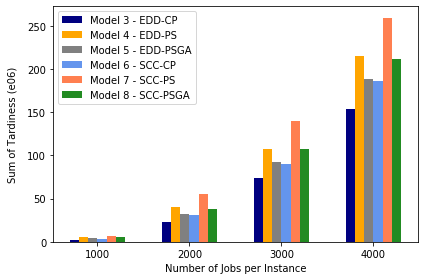

In [9]:
# compare average tardiness between techniques for chapter 2
fig, ax = plt.subplots()
width = 0.1
x = [-width * 2.5, -width * 1.5, -width * 0.5, width * 0.5, width * 1.5, width * 2.5]
colors = ['navy', 'orange', 'grey', 'cornflowerblue', 'coral', 'forestgreen']
for model in range(3, 9):
    for k, key in enumerate(chap3_sum[model].keys()):
        avg_tardy = np.mean(chap3_sum[model][key][1]['tardiness']) / 1000000
        if k == 0:
            ax.bar(k + x[model - 3],
                   avg_tardy,
                   width,
                   color=colors[model - 3],
                   label=f'Model {model} - {model_names[model]}')
        else:
            ax.bar(k + x[model - 3],
                   avg_tardy,
                   width,
                   color=colors[model - 3])
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['1000', '2000', '3000', '4000'])
ax.set_xlabel('Number of Jobs per Instance')
ax.set_ylabel('Sum of Tardiness (e06)', labelpad=10)
ax.legend()
fig.tight_layout()
plt.savefig('ch3_comptardy.pdf', format='pdf', bbox_inches='tight')
plt.show()

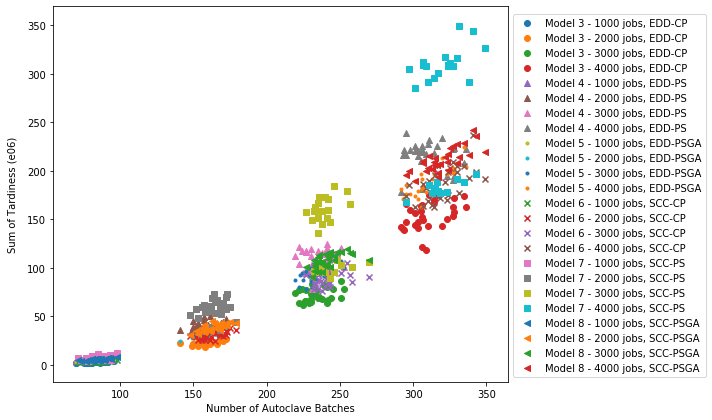

In [10]:
# compare numbins to tardiness for chapter 3
fig, ax = plt.subplots(figsize=(10, 6.3))
params = ['o', '^', '.', 'x', ',', '<']
for model in range(3, 9):
    for key in chap3_sum[model].keys():
        numbins = []
        tardiness = []
        for i in range(30):
            numbins.append(chap3_sum[model][key][0]['numbins'][i])
            tardiness.append(chap3_sum[model][key][1]['tardiness'][i])
        ax.scatter(numbins,
                   [tardiness[j] / 1000000 for j in range(30)],
                   marker=params[model - 3],
                   label=f'Model {model} - {key} jobs, {model_names[model]}')
ax.set_xlabel('Number of Autoclave Batches')
ax.set_ylabel('Sum of Tardiness (e06)', labelpad=10)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
fig.tight_layout()
plt.savefig('ch3_binstotardy.pdf', format='pdf', bbox_inches='tight')
plt.show()

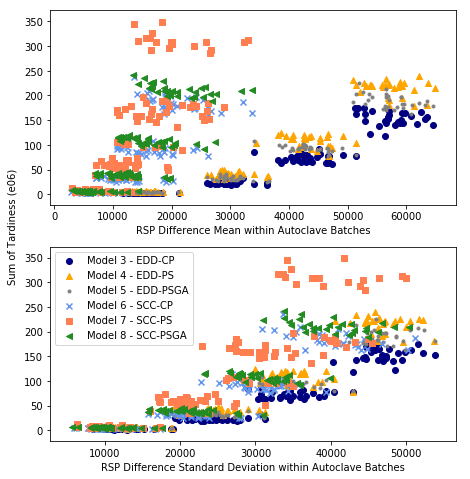

In [11]:
# compare tardiness to RSP distribution for chapter 3
fig, ax = plt.subplots(2, figsize=(7, 7))
params = ['o', '^', '.', 'x', ',', '<']
colors = ['navy', 'orange', 'grey', 'cornflowerblue', 'coral', 'forestgreen']
for model in range(3, 9):
    for key in chap3_sum[model].keys():
        rsp_mean = []
        rsp_stdev = []
        tardiness = []
        for i in range(30):
            df = chap3_instances[model]['b2_results'][key][i]['rsp_diff'][chap3_instances[model]['b2_results'][key][i]['rsp_diff'] != 0].dropna()
            tardiness.append(chap3_sum[model][key][1]['tardiness'][i] / 1000000)
            rsp_mean.append(np.mean(df))
            rsp_stdev.append(np.std(df))
        if key == 1000:
            ax[0].scatter(rsp_mean,
                          tardiness,
                          marker=params[model - 3],
                          color=colors[model - 3],
                          label=f'Model {model} - {model_names[model]}')
            ax[1].scatter(rsp_stdev,
                          tardiness,
                          marker=params[model - 3],
                          color=colors[model - 3],
                          label=f'Model {model} - {model_names[model]}')
        else:
            ax[0].scatter(rsp_mean, tardiness, marker=params[model - 3], color=colors[model - 3])
            ax[1].scatter(rsp_stdev, tardiness, marker=params[model - 3], color=colors[model - 3])
ax[1].legend()
ax[0].set_xlabel('RSP Difference Mean within Autoclave Batches')
ax[1].set_xlabel('RSP Difference Standard Deviation within Autoclave Batches')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Sum of Tardiness (e06)', labelpad=10)
fig.tight_layout()
plt.savefig('ch3_rspdistrib.pdf', format='pdf', bbox_inches='tight')
plt.show()

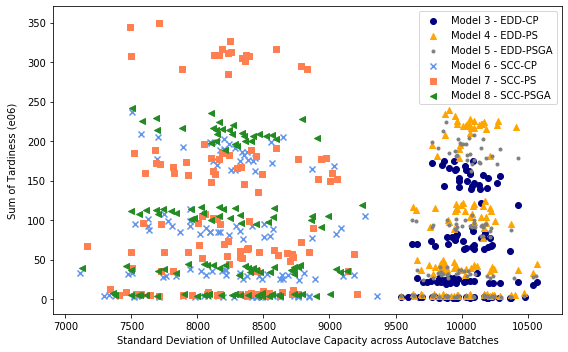

In [12]:
# compare standard deviation of unfilled capacity to tardiness for chapter 3
fig, ax = plt.subplots(figsize=(8, 5))
params = ['o', '^', '.', 'x', ',', '<']
colors = ['navy', 'orange', 'grey', 'cornflowerblue', 'coral', 'forestgreen']
for model in range(3, 9):
    for key in chap3_sum[model].keys():
        tardiness = []
        unfill_stdev = []
        for i in range(30):
            tardiness.append(chap3_sum[model][key][1]['tardiness'][i] / 1000000)
            unfill_stdev.append(np.std(chap3_instances[model]['b2_results'][key][i]['b2_capacity'] - 
                                       chap3_instances[model]['b2_results'][key][i]['b2_tools_size']))
        if key == 1000:
            ax.scatter(unfill_stdev,
                       tardiness,
                       marker=params[model - 3],
                       color=colors[model - 3],
                       label=f'Model {model} - {model_names[model]}')
        else:
            ax.scatter(unfill_stdev,
                       tardiness,
                       marker=params[model - 3],
                       color=colors[model - 3])
ax.set_xlabel('Standard Deviation of Unfilled Autoclave Capacity across Autoclave Batches')
ax.set_ylabel('Sum of Tardiness (e06)', labelpad=10)
ax.legend()
fig.tight_layout()
plt.savefig('ch3_unfillcap.pdf', format='pdf', bbox_inches='tight')
plt.show()

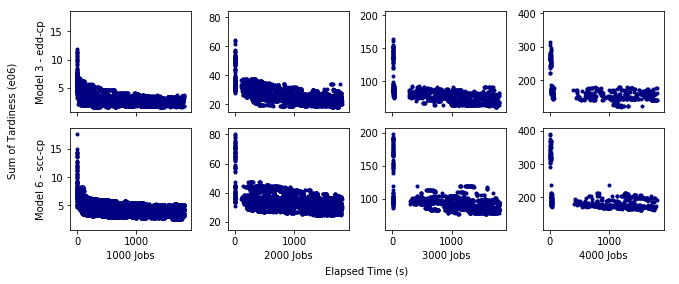

In [13]:
# extract schedule quality over time pattern for CP sched for models 3 to 5
fig, ax = plt.subplots(2, 4, figsize=(10, 4.5), sharex='all', sharey='col')
for j, model in enumerate([3, 6]):
    for k, key in enumerate(chap3_sum[model].keys()):
        for i in range(30):
            ax[j][k].scatter(chap3_instances[model]['qual'][key][i]['time'],
                             chap3_instances[model]['qual'][key][i]['quality'] / 1000000,
                             marker='.',
                             color='navy')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax[1][0].set_xlabel('1000 Jobs')
ax[1][1].set_xlabel('2000 Jobs')
ax[1][2].set_xlabel('3000 Jobs')
ax[1][3].set_xlabel('4000 Jobs')
ax[0][0].set_ylabel('Model 3 - edd-cp')
ax[1][0].set_ylabel('Model 6 - scc-cp')
plt.xlabel('Elapsed Time (s)', labelpad=20)
plt.ylabel('Sum of Tardiness (e06)', labelpad=30)
fig.tight_layout()
plt.savefig('ch3_qualovertime.pdf', format='pdf', bbox_inches='tight')
plt.show()

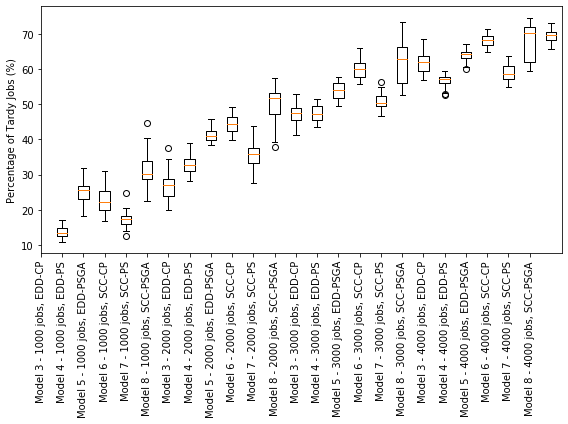

In [14]:
# compare the percentage of tardy jobs across techniques for chapter 3
fig, ax = plt.subplots(figsize=(8, 6))
x = 0
colors = ['navy', 'orange', 'grey', 'cornflowerblue']
xticks = []
data = []
for k, key in enumerate(chap3_sum[8].keys()):
    for model in range(3, 9):
        percent_tardy = []
        for i in range(30):
            percent_tardy.append(np.count_nonzero(chap3_instances[model]['job_results'][key][i]['job_tardiness']) /
                                 key * 100)
        data.append(percent_tardy)
        xticks.append(f'Model {model} - {key} jobs, {model_names[model]}')
        x = x + 1
ax.boxplot(data)
ax.set_ylabel('Percentage of Tardy Jobs (%)')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
ax.set_xticklabels(xticks, rotation='vertical')
fig.tight_layout()
plt.savefig('ch3_percenttardy.pdf', format='pdf', bbox_inches='tight')
plt.show()

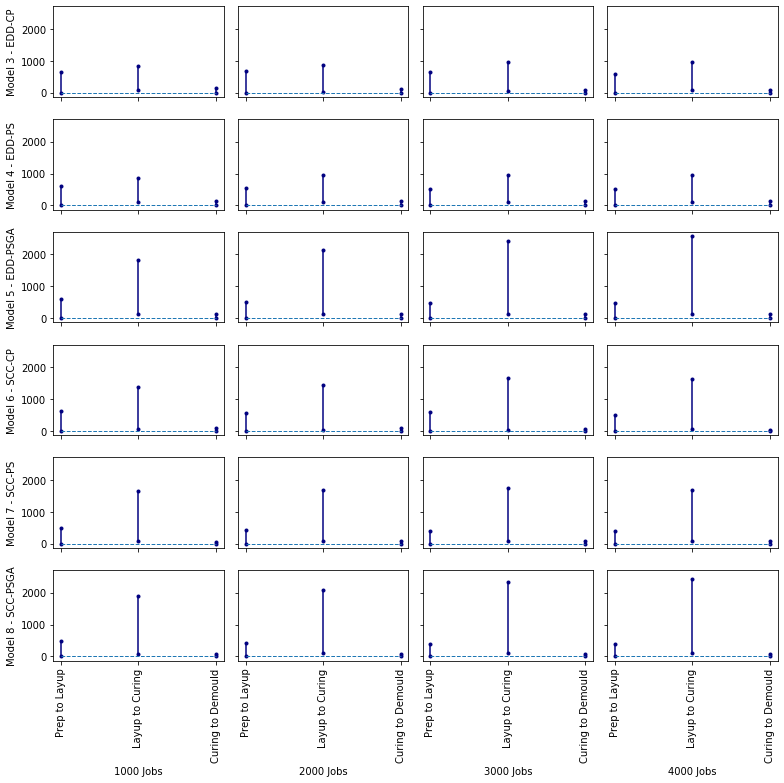

In [15]:
# compare lag time between stages for each job for chapter 3
fig, ax = plt.subplots(6, 4, figsize=(11, 11), sharex=True, sharey=True)
for model in range(3, 9):
    ax[model - 3][0].set_ylabel(f'Model {model} - {model_names[model]}')
    for k, key in enumerate(chap3_sum[model].keys()):
        if model == 8:
            ax[model - 3][k].set_xlabel(f'{key} Jobs')
            ax[model - 3][k].set_xticks([1, 2, 3])
            ax[model - 3][k].set_xticklabels(['Prep to Layup',
                                              'Layup to Curing',
                                              'Curing to Demould'], rotation='vertical')
        p_to_l = []
        l_to_a = []
        a_to_d = []
        for i in range(30):
            p_to_l.append([chap3_instances[model]['job_results'][key][i]['job_layup_start'][j] - 
                           chap3_instances[model]['job_results'][key][i]['job_prep_end'][j] for j in range(key)])
            l_to_a.append([chap3_instances[model]['job_results'][key][i]['job_auto_start'][j] -
                           chap3_instances[model]['job_results'][key][i]['job_layup_end'][j] for j in range(key)])
            a_to_d.append([chap3_instances[model]['job_results'][key][i]['job_demould_start'][j] -
                           chap3_instances[model]['job_results'][key][i]['job_auto_end'][j] for j in range(key)])
        ax[model - 3][k].plot([1, 1],
                              [np.percentile(p_to_l, 25),
                               np.percentile(p_to_l, 75)],
                              color='navy',
                              marker='.')
        ax[model - 3][k].plot([2, 2],
                              [np.percentile(l_to_a, 25),
                               np.percentile(l_to_a, 75)],
                              color='navy',
                              marker='.')
        ax[model - 3][k].plot([3, 3],
                              [np.percentile(a_to_d, 25),
                               np.percentile(a_to_d, 75)],
                              color='navy',
                              marker='.')
        ax[model - 3][k].plot([1, 3], [0, 0], linewidth=1, linestyle='--')
fig.tight_layout()
plt.savefig('ch3_avgidletime.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [16]:
# get resource usage information
filepath = f'../../archive/experiments_2/instances_042220_0/jobs_100/instance_0.xlsx'
machine_shifts = pd.read_excel(filepath,
                               sheet_name='machine_shifts')
machine_cells = pd.read_excel(filepath,
                               sheet_name='machines',
                               usecols='A:B')
labour_shifts = pd.read_excel(filepath,
                              sheet_name='labour_shifts')
machine_counts = {}
for i in range(47):
    machine_counts[machine_cells['Name'][i]] = machine_cells['Number of Cells'][i]
machines = {}
labours = {}
for i in range(47):
    temp = {}
    day = 0
    for j in range(49):
        time = round(day + machine_shifts[machine_shifts.columns[j + 1]][0] * 24 * 60)
        if machine_shifts[machine_shifts.columns[j + 1]][2 + i] == 'ON':
            temp[time] = machine_counts[machine_shifts[machine_shifts.columns[0]][2 + i]]
        else:
            temp[time] = 0
        if machine_shifts[machine_shifts.columns[j + 1]][0] == 0.9375:
            day += 24 * 60
    machines[machine_shifts[machine_shifts.columns[0]][2 + i]] = temp
for i in range(21):
    temp = {}
    day = 0
    for j in range(49):
        time = round(day + machine_shifts[machine_shifts.columns[j + 1]][0] * 24 * 60)
        temp[time] = labour_shifts[labour_shifts.columns[j + 1]][2 + i]
        if machine_shifts[machine_shifts.columns[j + 1]][0] == 0.9375:
            day += 24 * 60
    labours[labour_shifts[labour_shifts.columns[0]][2 + i]] = temp

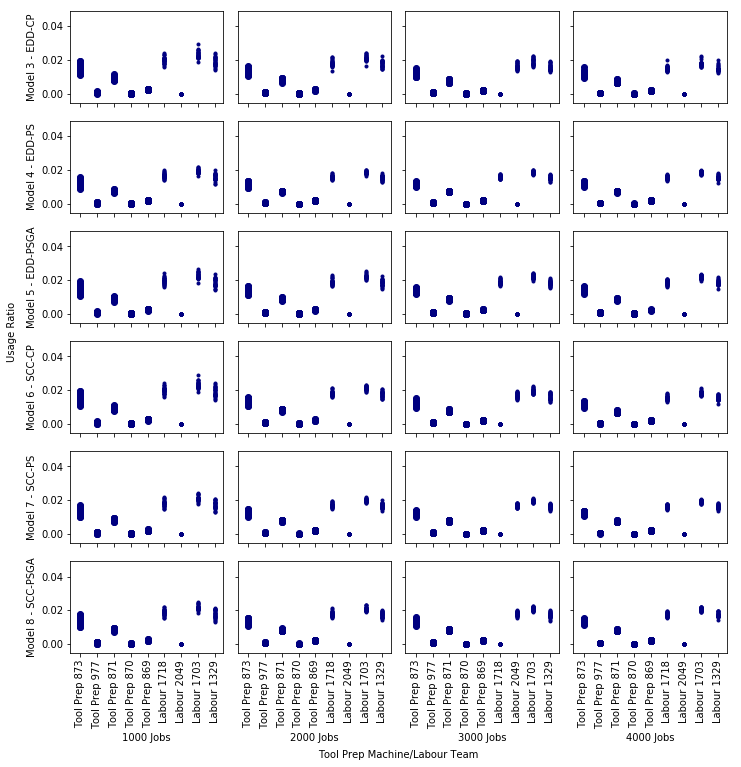

In [17]:
# compare tool prep resource usage ratios for chapter 3
fig, ax = plt.subplots(6, 4, figsize=(11, 12), sharex=True, sharey=True)
for model in range(3, 9):
    ax[model - 3][0].set_ylabel(f'Model {model} - {model_names[model]}')
    ax[model - 3][0].set_yticks([0,0.02, 0.04])
    for j, key in enumerate(chap3_sum[model].keys()):
        for i in range(30):
            prep_machines = chap3_instances[model]['b1_results'][key][i]['b1_prep_machine']
            time_used = [chap3_instances[model]['b1_results'][key][i]['b1_prep_end'][j] -
                         chap3_instances[model]['b1_results'][key][i]['b1_prep_start'][j] 
                         for j in range(len(chap3_instances[model]['b1_results'][key][i]['b1_prep_machine']))]
            final = max(chap3_instances[model]['b1_results'][key][i]['b1_prep_end'])
            total_time_used = {}
            for machine in list(set(list(prep_machines))):
                total_time_used[machine] = 0
            for k, machine in enumerate(prep_machines):
                total_time_used[machine] = total_time_used[machine] + time_used[k]
            for machine in total_time_used.keys():
                avail = 0
                time = 0
                day = 0
                shift = 0
                while time < final:
                    time = day * 7 * 24 * 60 + list(machines[machine].keys())[shift]
                    if shift == 48:
                        avail += machines[machine][time - day * 7 * 24 * 60] * (10080 - 9990)
                    else:
                        avail += (machines[machine][time - day * 7 * 24 * 60] *
                                  (list(machines[machine].keys())[shift + 1] - list(machines[machine].keys())[shift]))
                    shift += 1
                    if shift == 49:
                        shift = 0
                        day += 1
                ax[model - 3][j].scatter(machine, total_time_used[machine] / avail,
                                         color='navy')
            prep_labour = chap3_instances[model]['b1_results'][key][i]['b1_prep_labour']
            time_used = [(chap3_instances[model]['b1_results'][key][i]['b1_prep_end'][j] -
                         chap3_instances[model]['b1_results'][key][i]['b1_prep_start'][j]) * 
                         chap3_instances[model]['b1_results'][key][i]['b1_prep_labour_qty'][j] 
                         for j in range(len(chap3_instances[model]['b1_results'][key][i]['b1_prep_labour']))]
            final = max(chap3_instances[model]['b1_results'][key][i]['b1_prep_end'])
            total_time_used = {}
            for labour in list(set(list(prep_labour))):
                total_time_used[labour] = 0
            for k, labour in enumerate(prep_labour):
                total_time_used[labour] = total_time_used[labour] + time_used[k]
            for labour in total_time_used.keys():
                avail = 0
                time = 0
                day = 0
                shift = 0
                while time < final:
                    time = day * 7 * 24 * 60 + list(labours[labour].keys())[shift]
                    if shift == 48:
                        avail += labours[labour][time - day * 7 * 24 * 60] * (10080 - 9990)
                    else:
                        avail += (labours[labour][time - day * 7 * 24 * 60] *
                                  (list(labours[labour].keys())[shift + 1] - list(labours[labour].keys())[shift]))
                    shift += 1
                    if shift == 49:
                        shift = 0
                        day += 1
                ax[model - 3][j].scatter(labour, total_time_used[labour] / avail,
                                         color='navy', marker='.')
        ax[model - 3][j].set_ylim(bottom=-0.005)
        if model == 8:
            for label in ax[model - 3][j].get_xticklabels():
                label.set_rotation('vertical')
            ax[model - 3][j].set_xlabel(f'{key} Jobs')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Usage Ratio', labelpad=30)
plt.xlabel('Tool Prep Machine/Labour Team', labelpad=80)
fig.tight_layout()
plt.savefig('ch3_prepusageratios.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

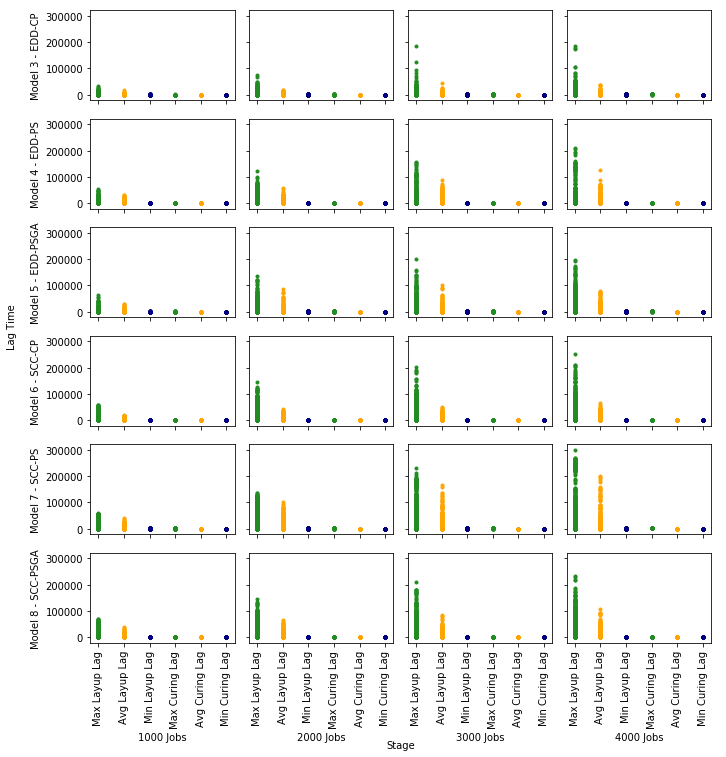

In [18]:
# compare autoclave and layup lag times for chapter 3
fig, ax = plt.subplots(6, 4, figsize=(11, 12), sharex=True, sharey=True)
for model in range(3, 9):
    ax[model - 3][0].set_ylabel(f'Model {model} - {model_names[model]}')
    for k, key in enumerate(chap3_sum[model].keys()):
        max_lay = []
        avg_lay = []
        min_lay = []
        max_auto = []
        avg_auto = []
        min_auto = []
        for i in range(30):
            autoclave_lag = []
            for j in range(len(chap3_instances[model]['b2_results'][key][i]['b2'])):
                lay = [chap3_instances[model]['b2_results'][key][i]['b2_auto_start'][j] - 
                       chap3_instances[model]['b1_results'][key][i]
                       [chap3_instances[model]['b1_results'][key][i]['b1_to_b2'] == j]['b1_layup_end']]
                max_lay.append(max(lay[0]))
                avg_lay.append(np.mean(lay[0]))
                min_lay.append(min(lay[0]))
                autoclave_lag.append(min(lay[0]))
            max_auto.append(max(autoclave_lag))
            avg_auto.append(np.mean(autoclave_lag))
            min_auto.append(min(autoclave_lag))
        ax[model - 3][k].scatter(['Max Layup Lag'] * len(max_lay),
                                 max_lay, marker='.',
                                 color='forestgreen')
        ax[model - 3][k].scatter(['Avg Layup Lag'] * len(avg_lay),
                                 avg_lay, marker='.',
                                 color='orange')
        ax[model - 3][k].scatter(['Min Layup Lag'] * len(min_lay),
                                 min_lay, marker='.',
                                 color='navy')
        ax[model - 3][k].scatter(['Max Curing Lag'] * len(max_auto),
                                 max_auto, marker='.',
                                 color='forestgreen')
        ax[model - 3][k].scatter(['Avg Curing Lag'] * len(avg_auto),
                                 avg_auto, marker='.',
                                 color='orange')
        ax[model - 3][k].scatter(['Min Curing Lag'] * len(min_auto),
                                 min_auto, marker='.',
                                 color='navy')
        if model == 8:
            for label in ax[model - 3][k].get_xticklabels():
                label.set_rotation('vertical')
            ax[model - 3][k].set_xlabel(f'{key} Jobs')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Lag Time', labelpad=50)
plt.xlabel('Stage', labelpad=80)
fig.tight_layout()
plt.savefig('ch3_detailedidletime.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

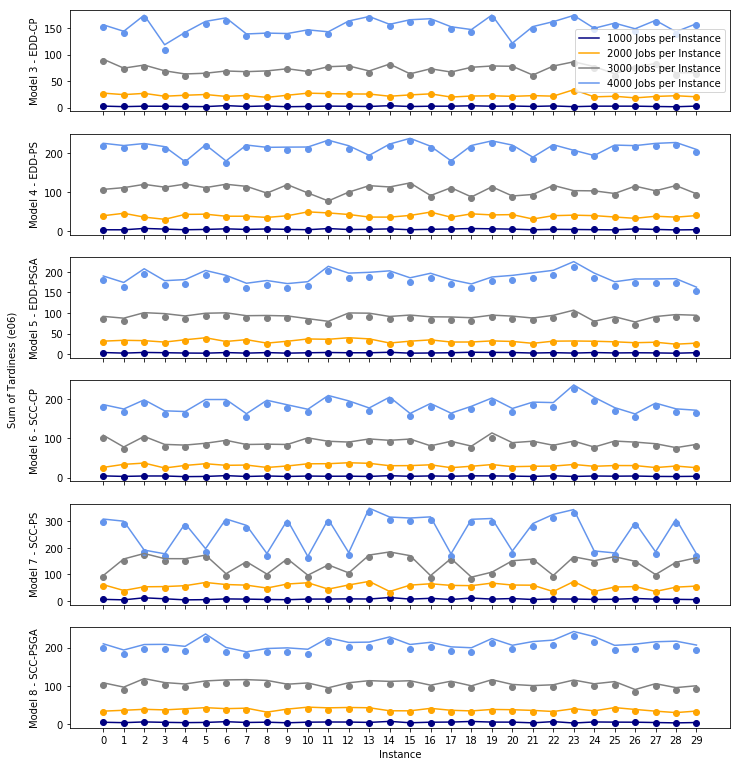

In [19]:
# find tool prep tardiness of each instance for chapter 3
fig, ax = plt.subplots(6, 1, figsize=(11, 11), sharex=True)
x = np.arange(0, 30)
colors = ['navy', 'orange', 'grey', 'cornflowerblue']
for model in range(3, 9):
    for k, key in enumerate(chap3_sum[model].keys()):
        sum_tardy = []
        chap3_instances[model]['job_results'][key][i] = chap3_instances[model]['job_results'][key][i].sort_values(by=['job'])
        for i in range(30):
            layup_time = chap3_instances[model]['job_results'][key][i]['job_layup_end'] - \
                         chap3_instances[model]['job_results'][key][i]['job_layup_start']
            auto_time = chap3_instances[model]['job_results'][key][i]['job_auto_end'] - \
                        chap3_instances[model]['job_results'][key][i]['job_auto_start']
            demould_time = chap3_instances[model]['job_results'][key][i]['job_demould_end'] - \
                           chap3_instances[model]['job_results'][key][i]['job_demould_start']
            prep_due = chap3_instances[model]['job_params'][key][i]['Due Date'] * 7 * 24 * 60 - \
                       layup_time - auto_time - demould_time
            prep_tardy = chap3_instances[model]['job_results'][key][i]['job_prep_end'] - prep_due
            prep_tardy = [max(0, prep_tardy[j]) for j in range(key)]
            sum_tardy.append(np.sum(prep_tardy) / 1000000)
        ax[model - 3].scatter(x, sum_tardy, marker='o', color=colors[k])
        ax[model - 3].plot(x,
                           [chap3_sum[model][key][1]['tardiness'][j] / 1000000 for j in range(30)],
                           color=colors[k],
                           label=f'{key} Jobs per Instance')
    ax[model - 3].set_ylabel(f'Model {model} - {model_names[model]}')
ax[0].legend()
ax[5].set_xticks(x)
ax[5].set_xlabel('Instance')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Sum of Tardiness (e06)', labelpad=30)
fig.tight_layout()
plt.savefig('ch3_preptardy.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

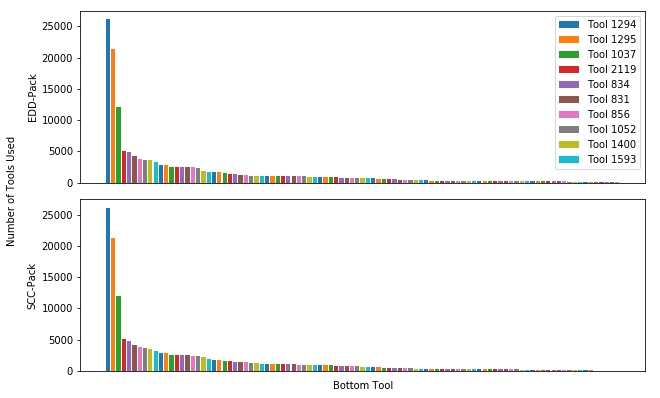

In [79]:
# compare tool usage popularity for chapter 3
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)
for j, model in enumerate([3, 6]):
    tool_usage = np.array([])
    for key in chap3_sum[model].keys():
        for i in range(30):
            tool_usage = np.append(tool_usage, chap3_instances[model]['b1_results'][key][i]['b1_bottom_tool'])
    distinct_tools = list(set(tool_usage))
    counts = {}
    for tool in distinct_tools:
        counts[tool] = np.count_nonzero(tool_usage == tool)
    for k, tool in enumerate(sorted(counts, key=counts.get, reverse=True)):
        if k < 10:
            ax[j].bar(k, counts[tool], label=tool)
        else:
            ax[j].bar(k, counts[tool])
ax[0].tick_params(bottom=False)
ax[0].set_ylabel('EDD-Pack')
ax[1].set_xlabel('Bottom Tool', labelpad=10)
ax[1].tick_params(bottom=False)
ax[1].set_xticks([])
ax[1].set_ylabel('SCC-Pack')
ax[0].legend()
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Number of Tools Used', labelpad=40)
fig.tight_layout()
plt.savefig('ch3_toolpopularity.pdf', format='pdf', bbox_inches='tight')
plt.show()

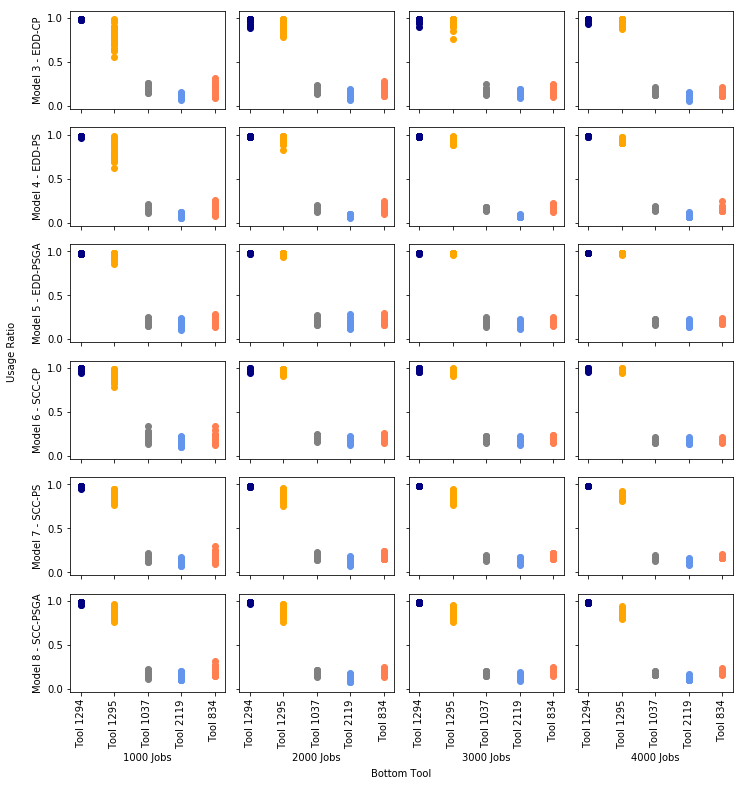

In [20]:
# compare usage ratios of 5 most popular bottom tools for chapter 3
fig, ax = plt.subplots(6, 4, figsize=(11, 12), sharex=True, sharey=True)
tools = ['Tool 1294', 'Tool 1295', 'Tool 1037', 'Tool 2119', 'Tool 834']
qtys = [2, 2, 5, 5, 2]
colors = ['navy', 'orange', 'grey', 'cornflowerblue', 'coral']
for model in range(3, 9):
    ax[model - 3][0].set_ylabel(f'Model {model} - {model_names[model]}')
    for k, key in enumerate(chap3_sum[model].keys()):
        for i in range(30):
            time_used = [chap3_instances[model]['b1_results'][key][i]['b1_demould_end'][j] -
                         chap3_instances[model]['b1_results'][key][i]['b1_prep_start'][j] 
                         for j in range(len(chap3_instances[model]['b1_results'][key][i]['b1']))]
            final = max(chap3_instances[model]['b1_results'][key][i]['b1_demould_end'])
            total_time_used = {}
            for tool in tools:
                total_time_used[tool] = 0
            for j in range(len(time_used)):
                if chap3_instances[model]['b1_results'][key][i]['b1_bottom_tool'][j] in tools:
                    total_time_used[chap3_instances[model]['b1_results'][key][i]['b1_bottom_tool'][j]] += time_used[j]
            for qty, tool, color in zip(qtys, tools, colors):
                ax[model - 3][k].scatter(tool, total_time_used[tool] / (final * qty), color=color)
        if model == 8:
            for label in ax[model - 3][k].get_xticklabels():
                label.set_rotation('vertical')
            ax[model - 3][k].set_xlabel(f'{key} Jobs')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Usage Ratio', labelpad=30)
plt.xlabel('Bottom Tool', labelpad=60)
fig.tight_layout()
plt.savefig('ch3_toolusageratios.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [33]:
# ANOVA of packing predictors on tardiness
anova_data = []
bin_q1 = (349 - 70) / 3 + 70
bin_q2 = (349 - 70) * 2 / 3 + 70
rsp_q1 = (53813 - 5610) / 3 + 5610
rsp_q2 = (53813 - 5610) * 2 / 3 + 5610
unfill_q1 = (10575 - 7107) / 3 + 7107
unfill_q2 = (10575 - 7107) * 2 / 3 + 7107
for model in [3, 6]:
    for key in chap3_sum[model].keys():
        for i in range(30):
            bin_cat = ''
            rsp_cat = ''
            unfill_cat = ''
            if chap3_sum[model][key][0]['numbins'][i] < bin_q1:
                bin_cat = 'low'
            elif chap3_sum[model][key][0]['numbins'][i] < bin_q2:
                bin_cat = 'medium'
            else:
                bin_cat = 'high'
            rsp_std = np.std(chap3_instances[model]['b2_results'][key][i]['rsp_diff']
                             [chap3_instances[model]['b2_results'][key][i]['rsp_diff'] != 0].dropna())
            if rsp_std < rsp_q1:
                rsp_cat = 'low'
            elif rsp_std < rsp_q1:
                rsp_cat = 'medium'
            else:
                rsp_cat = 'high'
            unfill_std = np.std(chap3_instances[model]['b2_results'][key][i]['b2_capacity'] - 
                                chap3_instances[model]['b2_results'][key][i]['b2_tools_size'])
            if unfill_std < unfill_q1:
                unfill_cat = 'low'
            elif unfill_std < unfill_q2:
                unfill_cat = 'medium'
            else:
                unfill_cat = 'high'
            anova_data.append((bin_cat, rsp_cat, unfill_cat, chap3_sum[model][key][1]['tardiness'][i]))
anova_df = pd.DataFrame(list(anova_data), columns=['numbins', 'rspstd', 'unfillstd', 'tardiness'])

In [58]:
model = ols('tardiness ~ C(numbins)', anova_df).fit()
results = sm.stats.anova_lm(model, typ=2)
f = open('anova_numbins.txt', 'w')
f.write(model.summary().as_text())
f.write('\n')
f.write(results.to_string())
f.close()

In [59]:
model = ols('tardiness ~ C(rspstd)', anova_df).fit()
results = sm.stats.anova_lm(model, typ=2)
f = open('anova_rspstd.txt', 'w')
f.write(model.summary().as_text())
f.write('\n')
f.write(results.to_string())
f.close()

In [60]:
model = ols('tardiness ~ C(unfillstd)', anova_df).fit()
results = sm.stats.anova_lm(model, typ=2)
f = open('anova_unfillstd.txt', 'w')
f.write(model.summary().as_text())
f.write('\n')
f.write(results.to_string())
f.close()

In [50]:
model = ols('tardiness ~ C(numbins)*C(rspstd)', anova_df).fit()
results = sm.stats.anova_lm(model, typ=2)
f = open('anova_numbins_rspstd.txt', 'w')
f.write(model.summary().as_text())
f.write('\n')
f.write(results.to_string())
f.close()

In [51]:
model = ols('tardiness ~ C(numbins)*C(unfillstd)', anova_df).fit()
results = sm.stats.anova_lm(model, typ=2)
f = open('anova_numbins_unfillstd.txt', 'w')
f.write(model.summary().as_text())
f.write('\n')
f.write(results.to_string())
f.close()

In [52]:
model = ols('tardiness ~ C(rspstd)*C(unfillstd)', anova_df).fit()
results = sm.stats.anova_lm(model, typ=2)
f = open('anova_rspstd_unfillstd.txt', 'w')
f.write(model.summary().as_text())
f.write('\n')
f.write(results.to_string())
f.close()

In [57]:
model = ols('tardiness ~ C(numbins)+C(rspstd)*C(unfillstd)+C(numbins)*C(unfillstd)', anova_df).fit()
results = sm.stats.anova_lm(model, typ=2)
f = open('anova_numbins_rspstd_unfillstd.txt', 'w')
f.write(model.summary().as_text())
f.write('\n')
f.write(results.to_string())
f.close()